## Extracting stocks data from finviz


In [1]:
#Lets import the required packages 

from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver import Keys
import time
from tabulate import tabulate
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

#### opening Finviz site and selecting Screener 

In [2]:
# Create a Chrome web driver instance and set up its service
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver = webdriver.Chrome()

# Define the URL you want to access
url = "https://finviz.com/"

# Open the specified URL in the web browser
driver.get(url)

# Maximize the web browser window
driver.maximize_window()

time.sleep(3)

# Click_login = driver.find_element(By.XPATH,'/html/body/table[2]/tbody/tr/td/table/tbody/tr/td[16]/a').click()
# time.sleep(2)
# Click_user = driver.find_element(By.XPATH,'/html/body/div[2]/div/div/form/label[1]/input')
# Click_user.send_keys("*******")
# time.sleep(2)
# click_psw = driver.find_element(By.XPATH,'/html/body/div[2]/div/div/form/label[2]/input')
# click_psw.send_keys("******")
# time.sleep(2)
# click_login = driver.find_element(By.XPATH,'/html/body/div[2]/div/div/form/input').click()

time.sleep(2)
click_screener = driver.find_element(By.XPATH, '/html/body/table[2]/tbody/tr/td/table/tbody/tr/td[3]/a').click()

#after executing the above code it will load the screener page 

### collection table data using Beautiful Soup

In [3]:
# Create a BeautifulSoup object to parse the HTML source code of the current web page.   
soup = BeautifulSoup(driver.page_source, 'html.parser')

table = soup.find('table',class_='styled-table-new is-rounded is-tabular-nums w-full screener_table')
header = table.find_all('th')

Header = []

for h in header:
    h = h.text
    Header.append(h)

df = pd.DataFrame(columns = Header)

def close_ad():
    try:
        # Use WebDriverWait to wait for the ad close button to appear
        close_button = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, "modal-elite-ad-close"))
        )
        # Click the close button to close the ad
        close_button.click()
    except:
        # If the ad close button doesn't appear within the timeout, do nothing
        pass

for v in range(435):
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    table = soup.find('table',class_='styled-table-new is-rounded is-tabular-nums w-full screener_table')
    

    #collecting table row data
    table_row = table.find_all('tr')


    for i in table_row[1:]:
        data = i.find_all('td')
    #     print(data)
        row = [tr.text for tr in data]
    #     print(row)
        l = len(df)
        df.loc[l] = row
    close_ad()
    next_button = WebDriverWait(driver, 3).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, '#screener-page-select > a:nth-child(3)'))
            ).click()
    print("page_collected",v)
print("ALL PAGES COLLECTED")

driver.quit()


page_collected 0
page_collected 1
page_collected 2
page_collected 3
page_collected 4
page_collected 5
page_collected 6
page_collected 7
page_collected 8
page_collected 9
page_collected 10
page_collected 11
page_collected 12
page_collected 13
page_collected 14
page_collected 15
page_collected 16
page_collected 17
page_collected 18
page_collected 19
page_collected 20
page_collected 21
page_collected 22
page_collected 23
page_collected 24
page_collected 25
page_collected 26
page_collected 27
page_collected 28
page_collected 29
page_collected 30
page_collected 31
page_collected 32
page_collected 33
page_collected 34
page_collected 35
page_collected 36
page_collected 37
page_collected 38
page_collected 39
page_collected 40
page_collected 41
page_collected 42
page_collected 43
page_collected 44
page_collected 45
page_collected 46
page_collected 47
page_collected 48
page_collected 49
page_collected 50
page_collected 51
page_collected 52
page_collected 53
page_collected 54
page_collected 55
pa

In [4]:
# df.drop_duplicates(subset="No.", inplace=True)

## Cleaning of the collected data

In [5]:
df

,No.,Ticker\n\n,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,1,A,Agilent Technologies Inc.,Healthcare,Diagnostics & Research,USA,30.91B,27.70,105.64,-3.38%,"3,204,185"
1,2,AA,Alcoa Corp,Basic Materials,Aluminum,USA,4.18B,-,23.44,0.13%,"7,557,444"
2,3,AAAU,Goldman Sachs Physical Gold ETF,Financial,Exchange Traded Fund,USA,-,-,19.54,-0.03%,"983,272"
3,4,AAC,Ares Acquisition Corporation,Financial,Shell Companies,USA,761.07M,-,10.78,0.19%,"124,269"
4,5,AACG,ATA Creativity Global ADR,Consumer Defensive,Education & Training Services,China,32.29M,-,1.03,-2.93%,"7,108"
...,...,...,...,...,...,...,...,...,...,...,...
8695,8696,ZALT,Innovator U.S. Equity 10 Buffer ETF - Quarterly,Financial,Exchange Traded Fund,USA,-,-,25.65,0.35%,"90,051"
8696,8697,ZAPP,Zapp Electric Vehicles Group Ltd,Consumer Cyclical,Auto Manufacturers,United Kingdom,16.09M,-,0.29,-5.48%,"615,945"
8697,8698,ZBH,Zimmer Biomet Holdings Inc,Healthcare,Medical Devices,USA,21.91B,43.61,104.84,-0.30%,"1,542,010"
8698,8699,ZBRA,Zebra Technologies Corp.,Technology,Communication Equipment,USA,10.57B,16.44,205.91,0.30%,"348,235"


In [6]:
#exporting collected data in excel format 
# df.to_excel(r'D:\TeraBoxDownload\Python\finvizscreener.xlsx')

In [7]:
#checking count of rows and columns
df.shape

(8700, 11)

In [8]:
#check if there is any null value 
df.isnull().sum()

No.           0
Ticker\n\n    0
Company       0
Sector        0
Industry      0
Country       0
Market Cap    0
P/E           0
Price         0
Change        0
Volume        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8700 entries, 0 to 8699
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No.         8700 non-null   object
 1   Ticker

    8700 non-null   object
 2   Company     8700 non-null   object
 3   Sector      8700 non-null   object
 4   Industry    8700 non-null   object
 5   Country     8700 non-null   object
 6   Market Cap  8700 non-null   object
 7   P/E         8700 non-null   object
 8   Price       8700 non-null   object
 9   Change      8700 non-null   object
 10  Volume      8700 non-null   object
dtypes: object(11)
memory usage: 815.6+ KB


In [10]:
#creating a copy and saving it in data
data = df

data['No.'] = data['No.'].apply(lambda x: int(x))
data['Volume'] = data['Volume'].str.replace(',', '').astype(int)
data['Change'] = data['Change'].replace('-', '0.0').str.replace('%', '').astype(float)
data['Price'] = data['Price'].replace('-', '0.0').astype(float)
data['P/E'] = data['P/E'].replace('-', '0.0').astype(float)

In [11]:
def convert_market_cap(market_cap_str):
    if market_cap_str == '-':
        return 0  # Replace hyphen with 0
    elif market_cap_str.endswith('B'):
        # Remove 'B' and convert to numeric (multiply by 1 billion)
        return float(market_cap_str.rstrip('B')) * 1e9
    elif market_cap_str.endswith('M'):
        # Remove 'M' and convert to numeric (multiply by 1 million)
        return float(market_cap_str.rstrip('M')) * 1e6
    else:
        # Handle other cases if needed
        return None  # or raise an error, depending on your requirement

# Apply the function to the 'Market Cap' column to convert and replace hyphens
data['Market Cap'] = data['Market Cap'].apply(convert_market_cap)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8700 entries, 0 to 8699
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No.         8700 non-null   int64  
 1   Ticker

    8700 non-null   object 
 2   Company     8700 non-null   object 
 3   Sector      8700 non-null   object 
 4   Industry    8700 non-null   object 
 5   Country     8700 non-null   object 
 6   Market Cap  8700 non-null   float64
 7   P/E         8700 non-null   float64
 8   Price       8700 non-null   float64
 9   Change      8700 non-null   float64
 10  Volume      8700 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 781.6+ KB


#### To know about the column meanings

1	Market Cap: Total value of a company's outstanding shares.

2	P/E (Price-to-Earnings) Ratio: Valuation metric comparing stock price to earnings.

3	Price: Current market price of a company's stock.

4	Change: Daily change in stock price or relevant metric.

5	Volume: Number of shares traded during a specified time.

In [13]:
data

,No.,Ticker\n\n,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,1,A,Agilent Technologies Inc.,Healthcare,Diagnostics & Research,USA,3.091000e+10,27.70,105.64,-3.38,3204185
1,2,AA,Alcoa Corp,Basic Materials,Aluminum,USA,4.180000e+09,0.00,23.44,0.13,7557444
2,3,AAAU,Goldman Sachs Physical Gold ETF,Financial,Exchange Traded Fund,USA,0.000000e+00,0.00,19.54,-0.03,983272
3,4,AAC,Ares Acquisition Corporation,Financial,Shell Companies,USA,7.610700e+08,0.00,10.78,0.19,124269
4,5,AACG,ATA Creativity Global ADR,Consumer Defensive,Education & Training Services,China,3.229000e+07,0.00,1.03,-2.93,7108
...,...,...,...,...,...,...,...,...,...,...,...
8695,8696,ZALT,Innovator U.S. Equity 10 Buffer ETF - Quarterly,Financial,Exchange Traded Fund,USA,0.000000e+00,0.00,25.65,0.35,90051
8696,8697,ZAPP,Zapp Electric Vehicles Group Ltd,Consumer Cyclical,Auto Manufacturers,United Kingdom,1.609000e+07,0.00,0.29,-5.48,615945
8697,8698,ZBH,Zimmer Biomet Holdings Inc,Healthcare,Medical Devices,USA,2.191000e+10,43.61,104.84,-0.30,1542010
8698,8699,ZBRA,Zebra Technologies Corp.,Technology,Communication Equipment,USA,1.057000e+10,16.44,205.91,0.30,348235


In [14]:
# df.to_excel(r'D:\TeraBoxDownload\Python\screenernew.xlsx')

## Lets visualize and collect some insights from the data

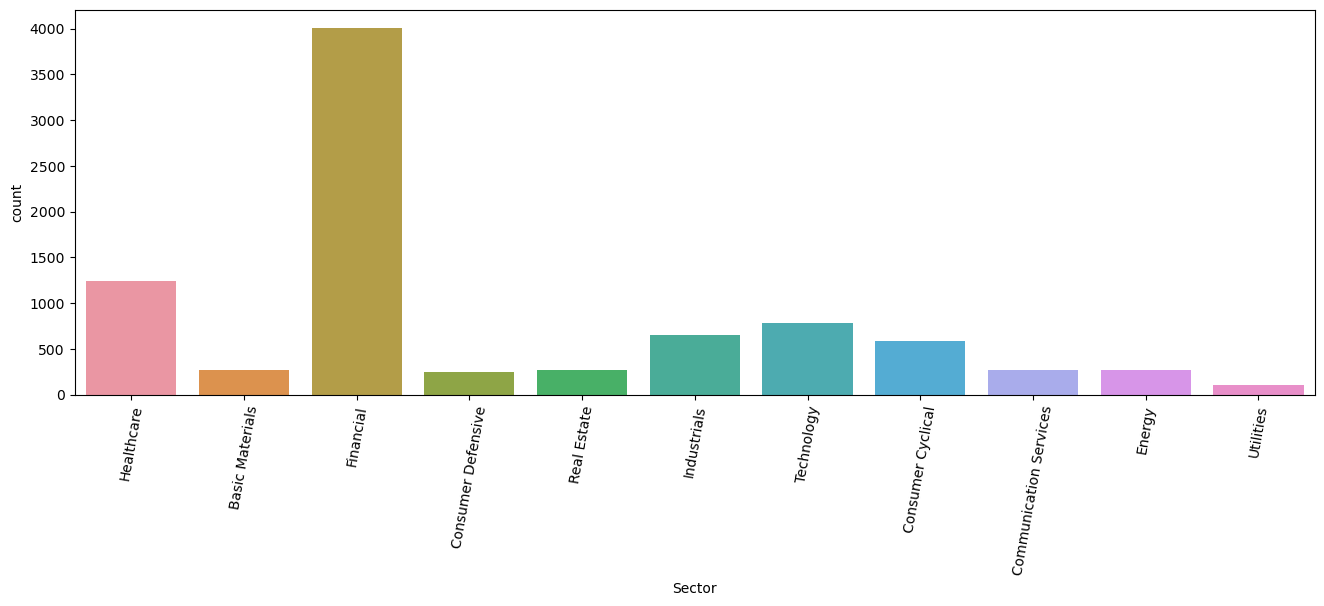

In [15]:
plt.figure(figsize = (16,5))
sns.countplot(x ='Sector', data = data)
plt.xticks(rotation=80)
plt.show()

##### from the above count plot we can see that financial companies are hugely listed in the screener whereas utilities companies are the least count listed in screener


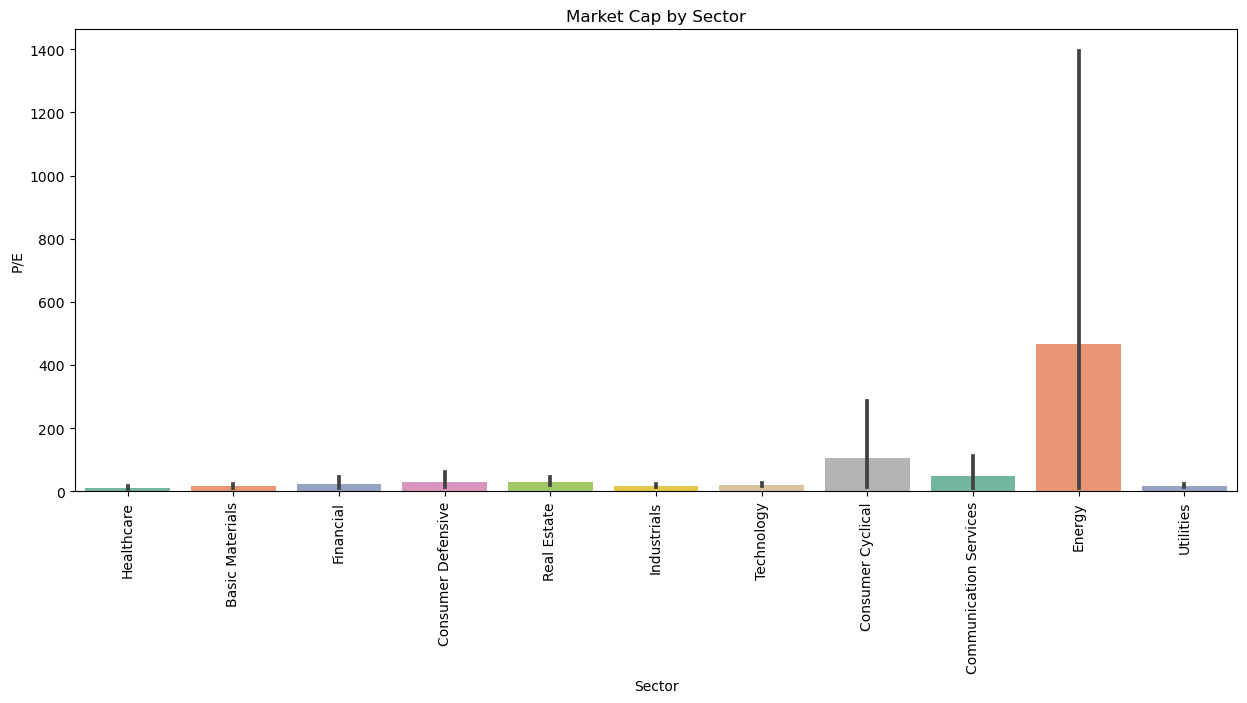

In [16]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Sector', y='P/E', palette='Set2', data=data)
plt.title('Market Cap by Sector')
plt.xlabel('Sector')
plt.ylabel('P/E')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

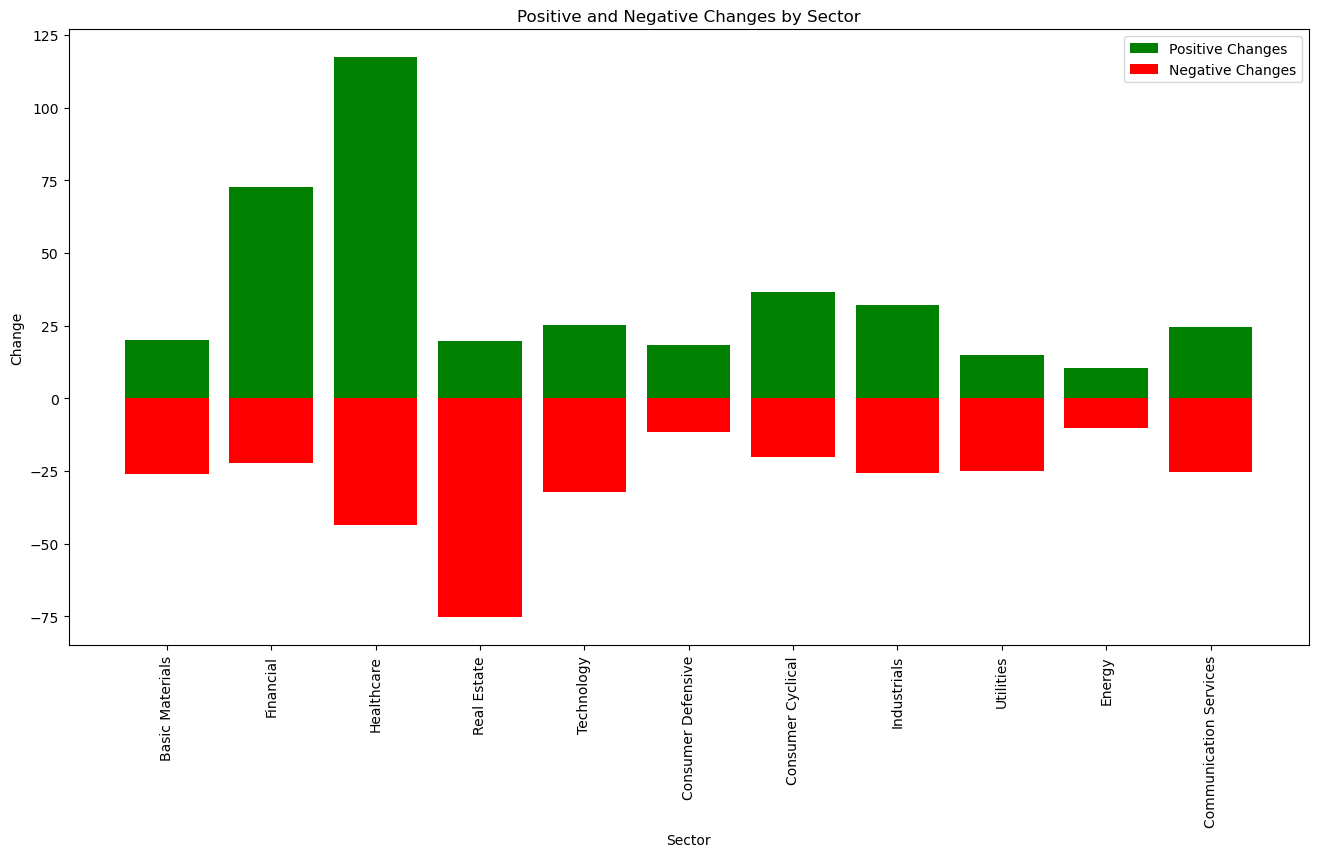

In [17]:
positive_changes = data[data['Change'] > 0]
negative_changes = data[data['Change'] < 0]

# Create a bar chart with different colors for positive and negative changes
plt.figure(figsize=(16, 8))
plt.bar(positive_changes['Sector'], positive_changes['Change'], color='green', label='Positive Changes')
plt.bar(negative_changes['Sector'], negative_changes['Change'], color='red', label='Negative Changes')
plt.xlabel('Sector')
plt.ylabel('Change')
plt.title('Positive and Negative Changes by Sector')
plt.xticks(rotation=90)
plt.legend()
plt.show()